### Question 1.  A Tensorflow2 Convolutional Neural Network on the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### 1.1 (1) Tensorflow2 imports 

In [20]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, ReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

tf.__version__

'2.3.1'

#### 1.2 (1) Load the Mnist data set into X_train,y_train,X_test and y_test


In [4]:
# Your Code Here
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### 1.3 (1) Display the 5th Image in the test set

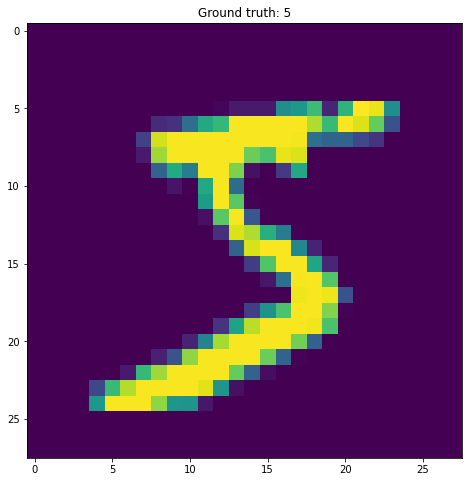

In [6]:
# Your Code Here
fig, ax1 = plt.subplots(1,1,figsize=[8,8])
ax1.imshow(X_train[0,:,:])
ax1.set_title(f"Ground truth: {y_train[0]}")

plt.show()


####  1.4 (2) Reshape each image to 28x28x1, convert to float32 and scale to between 0 and 1


In [12]:
# Your Code Here
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.


#### 1.5 (2) One-hot encode the target labels

In [9]:
# Your Code Here
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(f"Origin: {y_train[0]}")
print(f"Transform: {y_train_one_hot[0]}")


Origin: 5
Transform: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 1.6 (2) Split training data into training data and validation data 


In [14]:
# Your Code Here
train_X, valid_X, train_label, valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#### 1.7 (6) Specify the model structure and output a model summary

* Use two Convolutional 2D layers, 2 MaxPooling layers and 2 ReLu layers, 2 dropout layers and a Feed Foward layer.
* The two Convolutional 2D layers should have output of 16 and 32 channels
* Display a summary of the model

In [19]:
# Your Code Here
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation="linear", input_shape=(28,28,1), padding="same"))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation="linear", padding="same"))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
re_lu_3 (ReLU)               (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)         

#### 1.8 (1) Compile Model with cross entropy loss,  the Adam optimizer with a learning rate of 0.001 and an accuracy metric


In [21]:
# Your Code Here
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])


####  1.9 (3) Train the model with a mini-batch size of 128 for 10 epochs. Include the validation set.


In [22]:
# Your Code Here
model_train = model.fit(train_X, train_label, batch_size=128, epochs=10, verbose=1, validation_data=(valid_X, valid_label))


Epoch 1/10
375/375 [==============================] - 16s 42ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3020 - val_accuracy: 0.1106
Epoch 2/10
375/375 [==============================] - 17s 45ms/step - loss: 2.3013 - accuracy: 0.1128 - val_loss: 2.3019 - val_accuracy: 0.1106
Epoch 3/10
375/375 [==============================] - 22s 58ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.3023 - val_accuracy: 0.1106
Epoch 4/10
375/375 [==============================] - 23s 61ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.3018 - val_accuracy: 0.1106
Epoch 5/10
375/375 [==============================] - 23s 62ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.3018 - val_accuracy: 0.1106
Epoch 6/10
375/375 [==============================] - 26s 70ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.3017 - val_accuracy: 0.1106
Epoch 7/10
375/375 [==============================] - 25s 66ms/step - loss: 2.3011 - accuracy: 0.1128 - val_loss: 2.3018 - val_accuracy:

#### 1.10 (2) Plot the training and validation loss

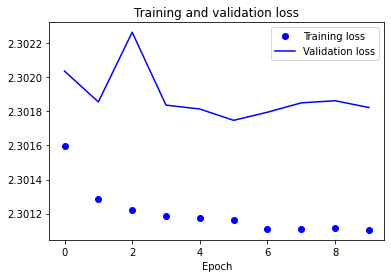

In [23]:
# Your Code Here
loss = model_train.history["loss"]
val_loss = model_train.history["val_loss"]
epochs = range(10)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

#### 1.11 (2) Evaluate the model on test set. Output the test loss and test accuracy

In [24]:
# Your Code Here
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test loss: {test_eval[0]}")
print(f"Test accuracy: {test_eval[1]}")


Test loss: 2.3010129928588867
Test accuracy: 0.11349999904632568


#### 1.12 (2) Predict the test data. Display a confusion matrix for the predicted and true label. Print the accuracy

In [25]:
# Your Code Here
y_hat = model.predict(X_test)
y_hat = np.argmax(np.round(y_hat),axis=1)
print(f"Predicted label: {y_hat[0]}, label: {y_test[0]}")
y_hat.shape, y_test.shape


Predicted label: 0, label: 7


((10000,), (10000,))

In [26]:
cm = confusion_matrix(y_hat, y_test)
print(cm)

print(f"Accuracy: {np.trace(cm)/np.sum(cm)}")

[[ 980 1135 1032 1010  982  892  958 1028  974 1009]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
Accuracy: 0.098
